In [271]:
import pandas as pd
import numpy as np
import numpy
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from math import sqrt
import math
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import time
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from scipy.stats import norm
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from pandas.core.frame import DataFrame
from sklearn.svm import SVR

# **PHASE 1

In [272]:
TestImgs = pd.read_csv("./DataSet/TestImgs.csv", header=None)
TrainImgs = pd.read_csv("./DataSet/TrainImgs.csv", header=None)
TestLabels = pd.read_csv("./DataSet/TestLabels.csv", header=None)
TrainLabels = pd.read_csv("./DataSet/TrainLabels.csv", header=None)

In [273]:
TestImgsText = np.loadtxt("./DataSet/TestImgs.csv", delimiter=',')
TrainImgsText = np.loadtxt("./DataSet/TrainImgs.csv", delimiter=',')
TestLabelsText = np.loadtxt("./DataSet/TestLabels.csv", delimiter=',')
TrainLabelsText = np.loadtxt("./DataSet/TrainLabels.csv", delimiter=',')

In [274]:
TestImgs

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
TrainImgs

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
TestLabels

,0
0,1
1,1
2,2
3,2
4,3
...,...
3355,26
3356,27
3357,27
3358,28


In [277]:
TrainLabels

,0
0,1
1,1
2,1
3,1
4,1
...,...
13435,28
13436,28
13437,28
13438,28


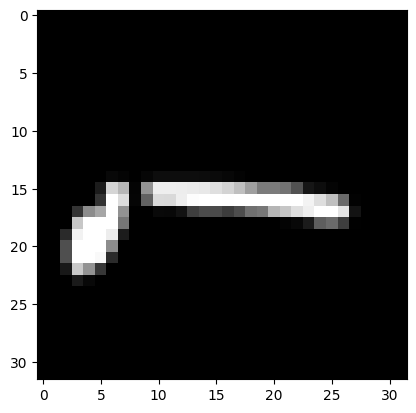

class :  1


In [278]:
number = 1
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

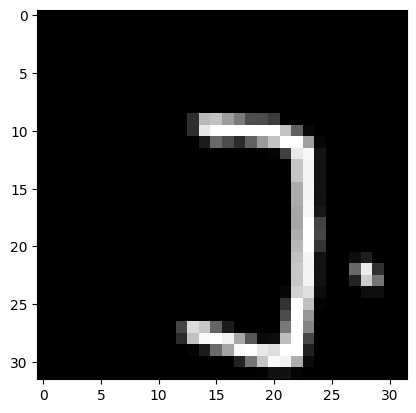

class :  2


In [279]:
number = 11
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

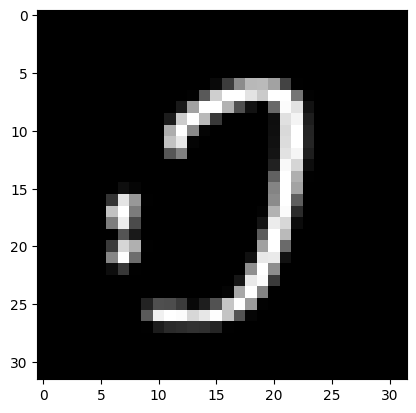

class :  3


In [280]:
number = 20
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

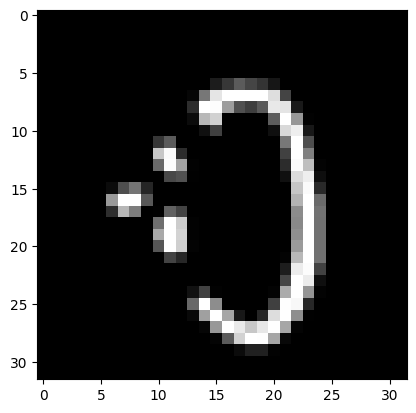

class :  4


In [281]:
number = 28
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

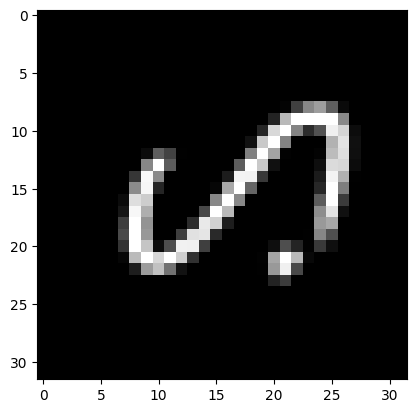

class :  5


In [282]:
number = 37
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

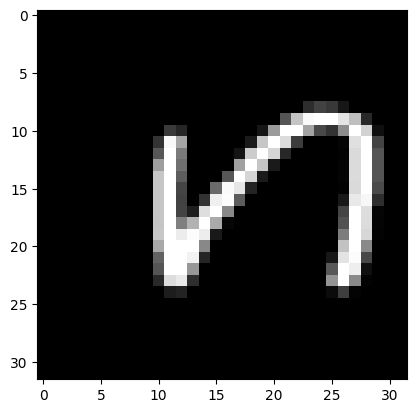

class :  6


In [283]:
number = 43
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

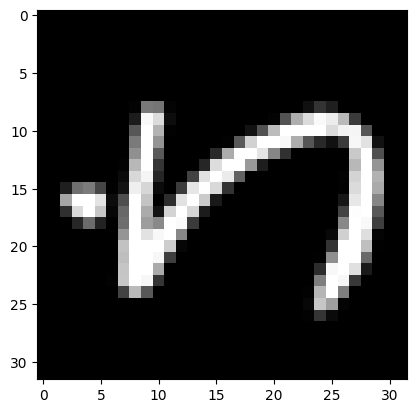

class :  7


In [284]:
number = 50
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

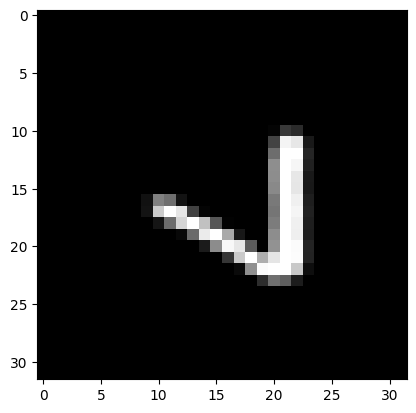

class :  8


In [285]:
number = 62
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

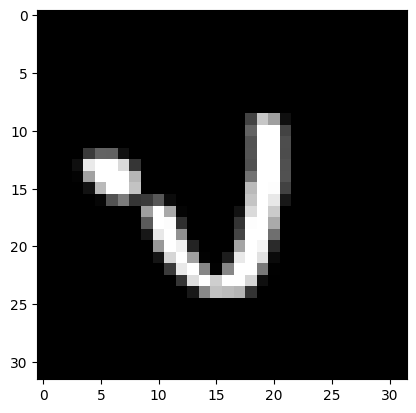

class :  9


In [286]:
number = 65
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

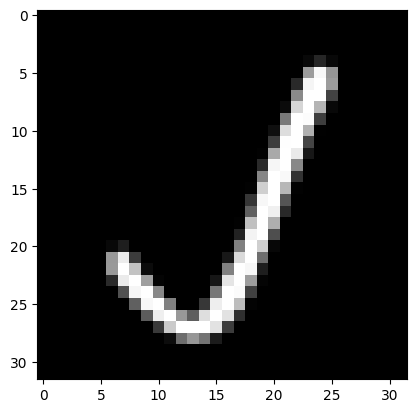

class :  10


In [287]:
number = 73
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

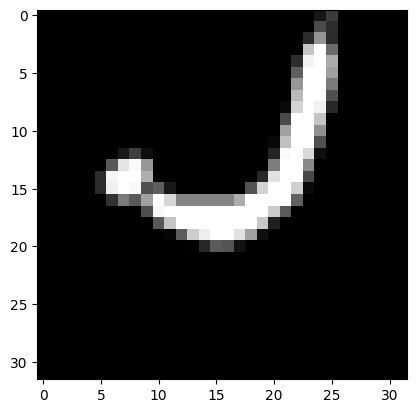

class :  11


In [288]:
number = 83
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

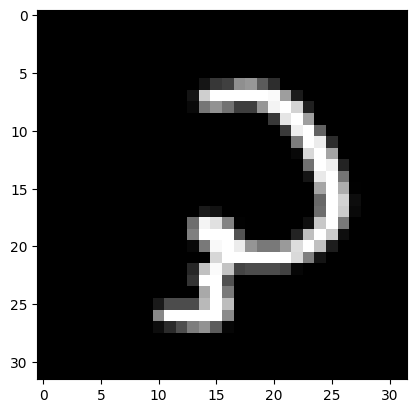

class :  12


In [289]:
number = 93
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

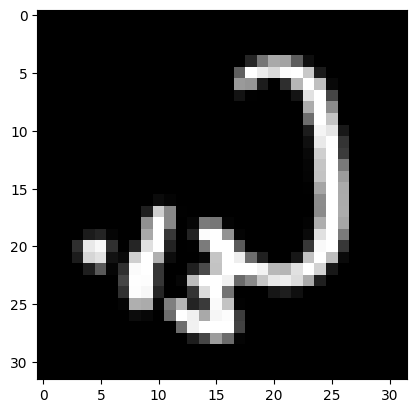

class :  13


In [290]:
number = 97
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

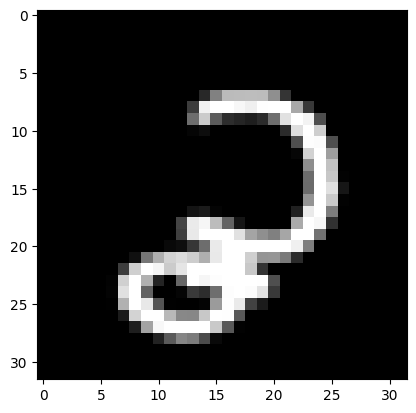

class :  14


In [291]:
number = 110
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

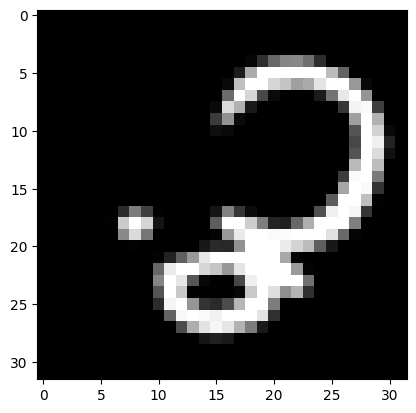

class :  15


In [292]:
number = 114
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

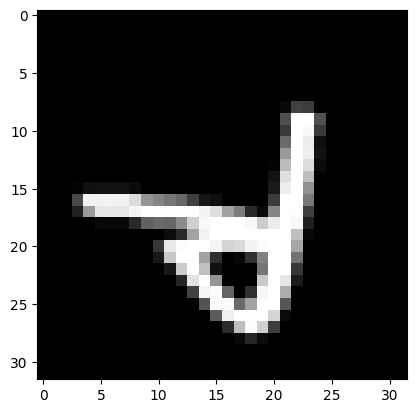

class :  16


In [293]:
number = 121
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

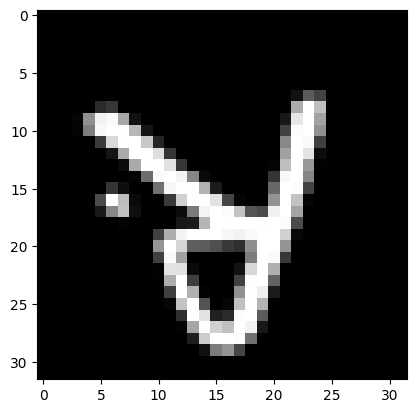

class :  17


In [294]:
number = 132
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

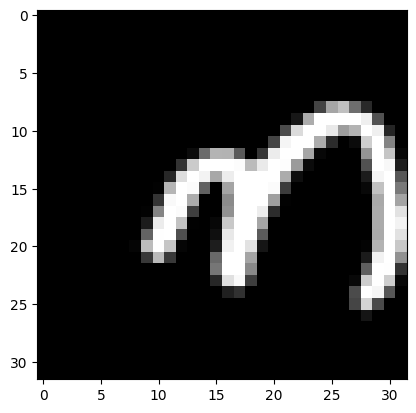

class :  18


In [295]:
number = 140
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

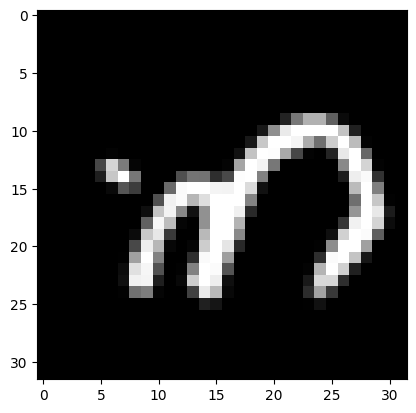

class :  19


In [296]:
number = 146
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

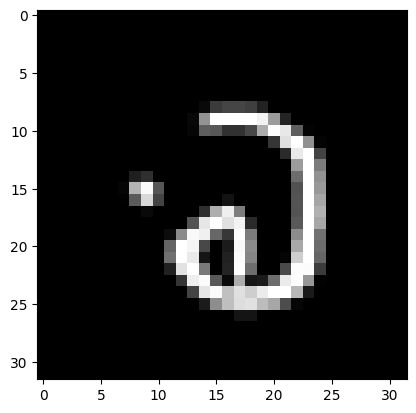

class :  20


In [297]:
number = 156
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

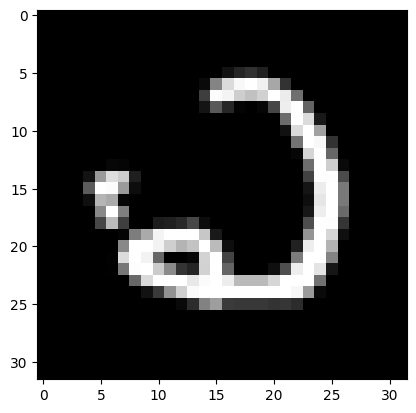

class :  21


In [298]:
number = 161
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

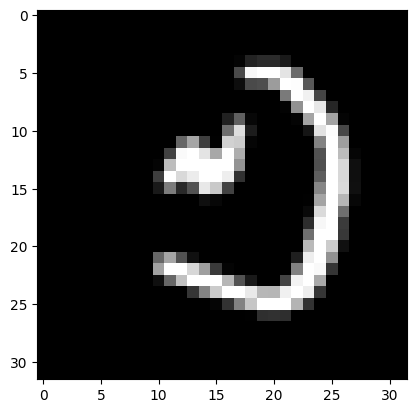

class :  22


In [299]:
number = 173
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

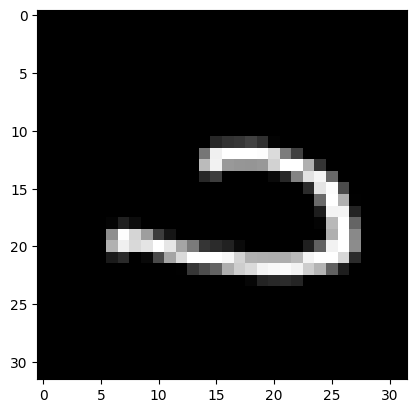

class :  23


In [300]:
number = 179
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

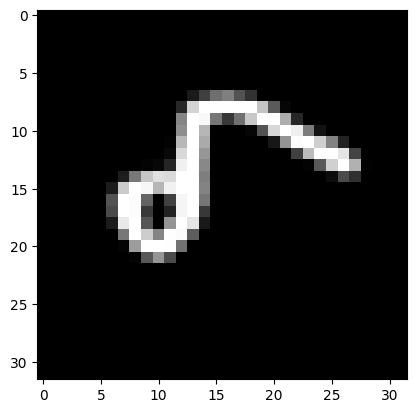

class :  24


In [301]:
number = 185
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

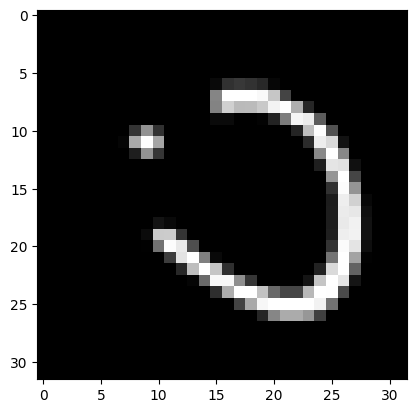

class :  25


In [302]:
number = 194
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

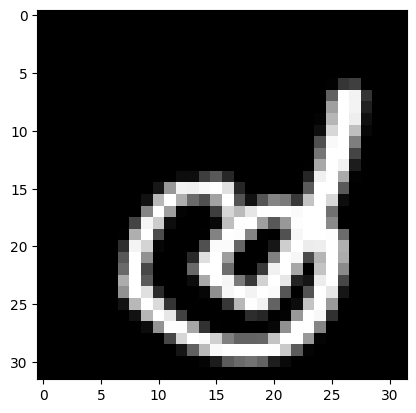

class :  26


In [303]:
number = 203
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

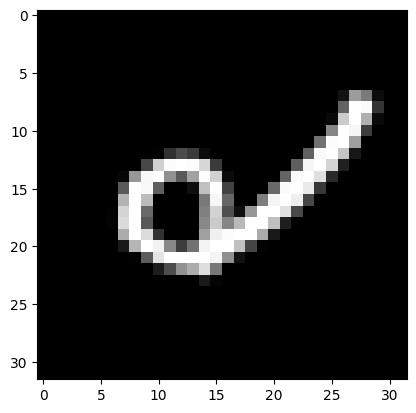

class :  27


In [304]:
number = 210
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

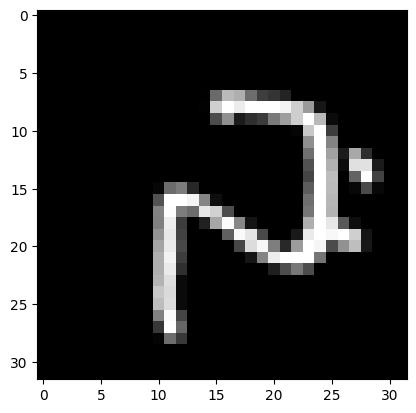

class :  28


In [305]:
number = 223
image = Image.fromarray(TrainImgsText[number].reshape(32, 32))
plt.imshow(image)
plt.show()
print("class : ", int(TrainLabelsText[number]))

<div dir="rtl">
    هر عکس 1024 پیکسل دارد که ابعاد آن 32 در 32 میباشد. و هر پیکسل میتواند مقدارش بین 0 تا 255 باشد.
</div>

In [306]:
OH = numpy.zeros((TrainLabels[0].size, TrainLabels[0].nunique()))
OH[numpy.arange(TrainLabels[0].size), TrainLabels[0].values - 1] = 1
pandas.DataFrame(OH)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



<div dir="rtl">
    این کار به این دلیل انجام می شود که برچسب ها ترتیبی نیستند و عدد بالاتر نشان دهنده چیزی نیست. 
اکنون آخرین لایه شبکه عصبی می تواند 16 نورون متناسب با 16 کلاس داشته باشد و هر کدام که عدد بیشتری داشته باشد به عنوان کلاس پیش بینی شده انتخاب می شود.
</div>


In [307]:
print('TrainLabels:', len(TrainLabels))

TrainLabels: 13440


In [308]:
print('TrainImgs:', len(TrainImgs))

TrainImgs: 13440


In [309]:
print('TestLabels:', len(TestImgs))

TestLabels: 3360


In [310]:
print('Test data:', len(TestLabels))

Test data: 3360


In [311]:
print('number of class:', 28)

number of class: 28


In [312]:
temp = TrainImgs.assign(label=TrainLabels.values)
temp = temp.loc[temp.label <= 16]
TrainImgs = temp.iloc[:, :-1]
TrainLabels = DataFrame(temp.iloc[:, -1])

temp = TestImgs.assign(label=TestLabels.values)
temp = temp.loc[temp.label <= 16]
TestImgs = temp.iloc[:, :-1]
TestLabels = DataFrame(temp.iloc[:, -1])

In [313]:
print('TrainLabels:', len(TrainLabels))

TrainLabels: 7680


In [314]:
print('TrainImgs:', len(TrainImgs))

TrainImgs: 7680


In [315]:
print('TestLabels:', len(TestImgs))

TestLabels: 1920


In [316]:
print('Test data:', len(TestLabels))

Test data: 1920


In [317]:
print('number of class:', 28)

number of class: 28


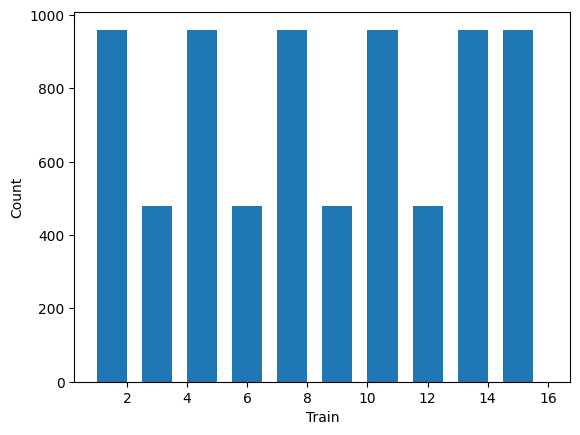

In [318]:
plt.hist(TrainLabels, width = 1);
plt.xlabel("Train")
plt.ylabel("Count")
plt.show()

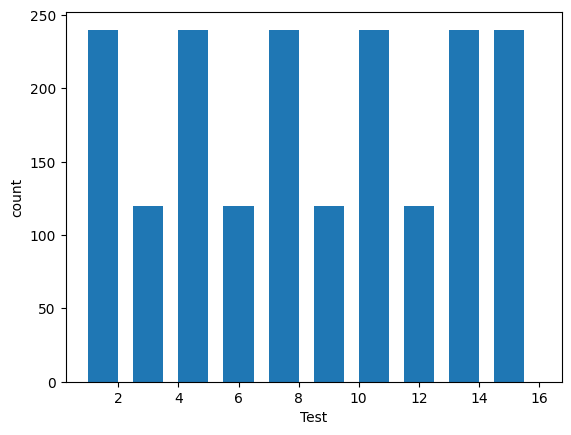

In [319]:
plt.hist(TestLabels, width = 1);
plt.xlabel("Test")
plt.ylabel("count")
plt.show()

In [320]:
TestImgs /= 255
TrainImgs /= 255

In [321]:
TestImgs

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
TrainImgs

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PHASE 2

# Data Loader

In [323]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''
        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        onehot_vectors = pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        temp = np.random.permutation((self.__data.shape[0]))
        self.__onehot_labels = self.__onehot_labels[temp]
        self.__data = self.__data[temp]

    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        if self.__shuffle:
            self.__shuffle_dataset()
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return    
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [324]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    def __init__(self): pass
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value
    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

In [325]:
class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    def __init__(self): pass
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        relu_value = matrix.copy()
        relu_value[relu_value < 0] = 0
        return relu_value
    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        relu_derivative = matrix.copy()
        relu_derivative[relu_derivative > 0] = 1
        relu_derivative[relu_derivative < 0] = 0
        return relu_derivative
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

In [326]:
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_value = np.matrix(np.where(temp > 0, temp, temp * self.negative_slope))
        return leacky_relu_value
    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        leacky_relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, self.negative_slope)))
        return leacky_relu_derivative
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

In [327]:
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    def __init__(self): pass
    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        sigmoid_value = 1.0 / (1.0 + np.exp(-matrix))
        return sigmoid_value
    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        npT = np.matrix(matrix, dtype=float)
        npT = self.__val(npT)
        sigmoid_derivative = np.multiply(npT, (1 - npT))
        return sigmoid_derivative
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

In [328]:
class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
    def __init__(self): pass
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        softmax_value = np.zeros(matrix.shape)
        for k in range(0, len(matrix)):
            softmax_value[k] = np.exp(matrix[k] - np.max(matrix[k]))
            softmax_value[k] /= np.sum(softmax_value[k])
        return softmax_value
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

In [329]:
class Tanh:
    def __init__(self): pass
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        tanh_value = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(tanh_value)
        return tanh_value
    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1 - np.power(self.__val(temp), 2)
        return tanh_derivative
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

# Loss Function

In [330]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        sf = Softmax()
        cross_entropy_value = np.sum(-np.multiply(np.matrix(expected_val, dtype=float),  np.log(sf(true_val))), axis=1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        sf = Softmax()
        cross_entropy_derivative = sf(true_val) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [331]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        om = np.matrix(np.ones((np.size(backprop_tensor,0), 1)))
        y = np.multiply(backprop_tensor, self.__last_activation_derivative)
        b = np.matmul(np.transpose(om), y)
        w = np.matmul(np.transpose(self.__last_input), y)
        backprop_tensor = np.matmul(y, np.transpose(self.__weight))
        self.__weight -= lr * w
        self.__bias -= lr * b
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
        weights = np.random.uniform(low = low, high = high, size = (dim1, dim2))
        return weights
    
    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
        weights = np.random.normal(loc = mean, scale = math.sqrt(var), size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [332]:
class FeedForwardNN:
    def __init__(self, input_shape):
        self.__input_shape = input_shape
        self.__output_shape = None
        self.__layers_list = []
        self.__lr = None
        self.__loss = None
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        return network_output
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"
        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        for epoch in range(1, epochs+1):
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
        return log
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    def __train_on_batch(self, x_batch, y_batch):
        temp = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(temp, y_batch)
        batch_average_loss = self.__update_weights(temp, y_batch)
        return (batch_accuracy, batch_average_loss)
    def __test_on_batch(self, x_batch, y_batch):
        temp = self.forward(x_batch)
        cm = CrossEntropy()
        batch_average_loss = np.sum(cm(temp, y_batch)) / len(temp)
        batch_accuracy = self.__compute_accuracy(temp, y_batch)
        return (batch_accuracy, batch_average_loss)
    def __get_labels(self, outputs):
        labels = np.argmax(outputs, axis = 1)
        return labels
    def __compute_accuracy(self, output, expected_output):
        accuracy = ((self.__get_labels(output) == self.__get_labels(expected_output)).sum()/len(output)) * 100
        return accuracy
    def __update_weights(self, output, y_train):
        # TODO: Implement
        ce = CrossEntropy()
        bl = ce(output, y_train)
        batch_average_loss = np.sum(bl)/len(output)
        ced = ce.derivative(output, y_train)
        for i in reversed(self.__layers_list):
            ced = i.update_weights(ced, self.__lr)
        return batch_average_loss

# PHASE 3

## PART 1

In [333]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 50
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=32)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=32)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.0	Average Loss: 2.7943063325884574
	Test: Average Accuracy: 6.25	Average Loss: 2.772658881203215
Epoch 2:
	Train: Average Accuracy: 0.0	Average Loss: 2.7877095275319683
	Test: Average Accuracy: 6.25	Average Loss: 2.772649901140705
Epoch 3:
	Train: Average Accuracy: 0.0	Average Loss: 2.787676112251948
	Test: Average Accuracy: 6.25	Average Loss: 2.7726519160427894
Epoch 4:
	Train: Average Accuracy: 0.0	Average Loss: 2.7876759968668106
	Test: Average Accuracy: 6.25	Average Loss: 2.7726518223553405
Epoch 5:
	Train: Average Accuracy: 0.0	Average Loss: 2.7876758587982047
	Test: Average Accuracy: 6.25	Average Loss: 2.772651764034367
Epoch 6:
	Train: Average Accuracy: 0.0	Average Loss: 2.7876757726339974
	Test: Average Accuracy: 6.25	Average Loss: 2.7726516764007303
Epoch 7:
	Train: Average Accuracy: 0.0	Average Loss: 2.7876690088236216
	Test: Average Accuracy: 6.25	Average Loss: 2.772651869371935
Epoch 8:
	Train: Average Accuracy: 0.0	Average Loss: 2.78767

## PART 2

<div dir="rtl">
    وقتی که همه وزن ها را صفر بگذاریم مشتقات ثابت می مانند. در نتیجه، نورون ها در هر دوره ویژگی های یکسانی را میاموزند. این مشکل به عنوان network failing to break symmetry شناخته میشود. به عبارتی دیگه این عمل باعث میشود لایه های hidden متقارن شوند پس این باعث میشود که مدل ما از مدل خطی بدتر باشد. پس در مقایسه با حالتی که رندوم وزن هارا مقدار دهی کنیم این حالت ضعف دارد.
</div>

## PART 3

In [334]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.05
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=32)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=32)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.0	Average Loss: 3.022843920090079
	Test: Average Accuracy: 6.25	Average Loss: 2.7794906687922465
Epoch 2:
	Train: Average Accuracy: 0.0	Average Loss: 2.9310234457246866
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 3:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 4:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 5:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 6:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 7:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 8:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724

	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 64:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 65:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 66:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 67:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 68:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 69:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677
	Test: Average Accuracy: 6.25	Average Loss: 2.779490668792043
Epoch 70:
	Train: Average Accuracy: 0.0	Average Loss: 2.931023445724677


In [335]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.0005
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=32)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=32)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 5.078125	Average Loss: 2.761300553523023
	Test: Average Accuracy: 6.25	Average Loss: 2.7215422008884436
Epoch 2:
	Train: Average Accuracy: 5.729166666666667	Average Loss: 2.734160697704184
	Test: Average Accuracy: 6.25	Average Loss: 2.7038607098322687
Epoch 3:
	Train: Average Accuracy: 6.25	Average Loss: 2.712255769078669
	Test: Average Accuracy: 7.34375	Average Loss: 2.683931317997789
Epoch 4:
	Train: Average Accuracy: 7.213541666666667	Average Loss: 2.6892375189296804
	Test: Average Accuracy: 9.270833333333334	Average Loss: 2.660741280075305
Epoch 5:
	Train: Average Accuracy: 8.203125	Average Loss: 2.66266626516545
	Test: Average Accuracy: 11.510416666666666	Average Loss: 2.6331812990207286
Epoch 6:
	Train: Average Accuracy: 9.505208333333334	Average Loss: 2.6309866114189644
	Test: Average Accuracy: 13.020833333333334	Average Loss: 2.6013979601036437
Epoch 7:
	Train: Average Accuracy: 9.973958333333334	Average Loss: 2.596117307997585
	Test: Average 

	Train: Average Accuracy: 51.393229166666664	Average Loss: 1.3646217651892092
	Test: Average Accuracy: 49.322916666666664	Average Loss: 1.4608489233978714
Epoch 55:
	Train: Average Accuracy: 52.2265625	Average Loss: 1.339515562763623
	Test: Average Accuracy: 49.583333333333336	Average Loss: 1.443203565592776
Epoch 56:
	Train: Average Accuracy: 52.994791666666664	Average Loss: 1.3156357835652697
	Test: Average Accuracy: 50.520833333333336	Average Loss: 1.4248618293173887
Epoch 57:
	Train: Average Accuracy: 54.036458333333336	Average Loss: 1.2924378577818123
	Test: Average Accuracy: 51.09375	Average Loss: 1.4072068732945127
Epoch 58:
	Train: Average Accuracy: 54.973958333333336	Average Loss: 1.2697526695515138
	Test: Average Accuracy: 51.875	Average Loss: 1.389116903379646
Epoch 59:
	Train: Average Accuracy: 55.768229166666664	Average Loss: 1.2476476457061125
	Test: Average Accuracy: 52.65625	Average Loss: 1.3709368305310918
Epoch 60:
	Train: Average Accuracy: 56.40625	Average Loss: 1.22

<div dir="rtl">
    همانطور که مشاهده میکیم وقتی lr را 0.05 میکنیم بسیار بد عمل میکند و از طرفی وقتی آن را 0.0005 میکنیم دقت خوبی دارد اما همانطور که میبینید از 0.005 جواب بدتری به ما میدهد. در این حالت قدرت یادگیری ما مقداری پایین میباشد.
پس ما باید یک نقطه عطف برای lr پیدا کنیم.
</div>

## PART 4

In [336]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=32)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=32)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(20, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.0	Average Loss: 2.859309000486235
	Test: Average Accuracy: 6.25	Average Loss: 2.7722626836643918
Epoch 2:
	Train: Average Accuracy: 0.0	Average Loss: 2.80503329243946
	Test: Average Accuracy: 6.510416666666667	Average Loss: 2.76474034426308
Epoch 3:
	Train: Average Accuracy: 0.0	Average Loss: 2.7843133626933905
	Test: Average Accuracy: 9.6875	Average Loss: 2.754131708256428
Epoch 4:
	Train: Average Accuracy: 1.8229166666666667	Average Loss: 2.7701052022412385
	Test: Average Accuracy: 10.989583333333334	Average Loss: 2.742151068665873
Epoch 5:
	Train: Average Accuracy: 4.479166666666667	Average Loss: 2.756572761017437
	Test: Average Accuracy: 11.71875	Average Loss: 2.7273159913119263
Epoch 6:
	Train: Average Accuracy: 6.184895833333333	Average Loss: 2.7400727671594116
	Test: Average Accuracy: 11.09375	Average Loss: 2.707057817396902
Epoch 7:
	Train: Average Accuracy: 7.291666666666667	Average Loss: 2.7170641711029853
	Test: Average Accuracy: 11.19791

	Train: Average Accuracy: 31.419270833333332	Average Loss: 1.7348571035884557
	Test: Average Accuracy: 29.427083333333332	Average Loss: 1.8693911130946437
Epoch 55:
	Train: Average Accuracy: 32.369791666666664	Average Loss: 1.718005103544986
	Test: Average Accuracy: 30.052083333333332	Average Loss: 1.853723323894447
Epoch 56:
	Train: Average Accuracy: 33.333333333333336	Average Loss: 1.6998797938346177
	Test: Average Accuracy: 30.520833333333332	Average Loss: 1.8360356208220852
Epoch 57:
	Train: Average Accuracy: 34.2578125	Average Loss: 1.680322058289735
	Test: Average Accuracy: 31.822916666666668	Average Loss: 1.8170860849493216
Epoch 58:
	Train: Average Accuracy: 35.3125	Average Loss: 1.6593897132394466
	Test: Average Accuracy: 31.927083333333332	Average Loss: 1.7977242101007915
Epoch 59:
	Train: Average Accuracy: 36.080729166666664	Average Loss: 1.6372534369431415
	Test: Average Accuracy: 33.697916666666664	Average Loss: 1.7781533446839977
Epoch 60:
	Train: Average Accuracy: 36.979

In [337]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=32)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=32)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(20, activation=Tanh(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.15625	Average Loss: 2.7883616569880663
	Test: Average Accuracy: 11.666666666666666	Average Loss: 2.7315851474709687
Epoch 2:
	Train: Average Accuracy: 6.3671875	Average Loss: 2.5726618942782133
	Test: Average Accuracy: 11.822916666666666	Average Loss: 2.511058808213051
Epoch 3:
	Train: Average Accuracy: 6.666666666666667	Average Loss: 2.3970675194521776
	Test: Average Accuracy: 15.677083333333334	Average Loss: 2.4194225274842025
Epoch 4:
	Train: Average Accuracy: 17.486979166666668	Average Loss: 2.154826702851689
	Test: Average Accuracy: 29.010416666666668	Average Loss: 1.9962016289624986
Epoch 5:
	Train: Average Accuracy: 27.838541666666668	Average Loss: 1.887805714488118
	Test: Average Accuracy: 31.145833333333332	Average Loss: 1.8797241064330978
Epoch 6:
	Train: Average Accuracy: 31.953125	Average Loss: 1.7778501926903512
	Test: Average Accuracy: 35.572916666666664	Average Loss: 1.7961816185216484
Epoch 7:
	Train: Average Accuracy: 37.33072916666

	Train: Average Accuracy: 93.97135416666667	Average Loss: 0.18784628884868154
	Test: Average Accuracy: 68.125	Average Loss: 1.343078183960162
Epoch 54:
	Train: Average Accuracy: 95.48177083333333	Average Loss: 0.1541558786948179
	Test: Average Accuracy: 68.07291666666667	Average Loss: 1.302955041630444
Epoch 55:
	Train: Average Accuracy: 96.00260416666667	Average Loss: 0.13879599009269236
	Test: Average Accuracy: 68.80208333333333	Average Loss: 1.3278790920597894
Epoch 56:
	Train: Average Accuracy: 96.5234375	Average Loss: 0.1321256905801694
	Test: Average Accuracy: 68.17708333333333	Average Loss: 1.3611624166908673
Epoch 57:
	Train: Average Accuracy: 97.265625	Average Loss: 0.11777900405215495
	Test: Average Accuracy: 67.96875	Average Loss: 1.3786389855559311
Epoch 58:
	Train: Average Accuracy: 97.734375	Average Loss: 0.10738900914647971
	Test: Average Accuracy: 67.96875	Average Loss: 1.3731701976231463
Epoch 59:
	Train: Average Accuracy: 98.03385416666667	Average Loss: 0.099997432265

In [338]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=32)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=32)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.10416666666666667	Average Loss: 2.7934027248146633
	Test: Average Accuracy: 6.25	Average Loss: 2.772661928422092
Epoch 2:
	Train: Average Accuracy: 0.0	Average Loss: 2.7876776043264373
	Test: Average Accuracy: 6.770833333333333	Average Loss: 2.772626363745003
Epoch 3:
	Train: Average Accuracy: 0.0	Average Loss: 2.787641645797081
	Test: Average Accuracy: 6.875	Average Loss: 2.7725860505333557
Epoch 4:
	Train: Average Accuracy: 0.0	Average Loss: 2.787596898980649
	Test: Average Accuracy: 6.927083333333333	Average Loss: 2.7725373903398802
Epoch 5:
	Train: Average Accuracy: 0.0	Average Loss: 2.7875409462758194
	Test: Average Accuracy: 6.875	Average Loss: 2.772469244606208
Epoch 6:
	Train: Average Accuracy: 0.0	Average Loss: 2.787457472097864
	Test: Average Accuracy: 6.614583333333333	Average Loss: 2.7723718128427097
Epoch 7:
	Train: Average Accuracy: 0.0	Average Loss: 2.787340621791615
	Test: Average Accuracy: 6.614583333333333	Average Loss: 2.772230317

	Train: Average Accuracy: 38.020833333333336	Average Loss: 1.5548484959369806
	Test: Average Accuracy: 35.15625	Average Loss: 1.7851663841417682
Epoch 56:
	Train: Average Accuracy: 39.778645833333336	Average Loss: 1.4970657047105445
	Test: Average Accuracy: 35.0	Average Loss: 1.759516092270349
Epoch 57:
	Train: Average Accuracy: 40.403645833333336	Average Loss: 1.4791457197922486
	Test: Average Accuracy: 36.354166666666664	Average Loss: 1.7134214434567858
Epoch 58:
	Train: Average Accuracy: 41.809895833333336	Average Loss: 1.429353099851476
	Test: Average Accuracy: 35.46875	Average Loss: 1.7469080487659396
Epoch 59:
	Train: Average Accuracy: 41.575520833333336	Average Loss: 1.4074079417175456
	Test: Average Accuracy: 36.145833333333336	Average Loss: 1.697299074936417
Epoch 60:
	Train: Average Accuracy: 43.385416666666664	Average Loss: 1.3737331547731617
	Test: Average Accuracy: 35.989583333333336	Average Loss: 1.697434534841744
Epoch 61:
	Train: Average Accuracy: 44.127604166666664	Ave

<div dir="rtl">
    برخی از دلایلی که این دو تابع به درستی کار نمیکنند به شرح زیر است:
محدوده ای که این توابع دارای مشتق غیر صفر هستند کوتاه است و همچنین مقدار مشتق در آن محدوده ها نمی تواند بیشتر از 1 باشد.
در نتیجه با اعداد و ورودی های بزرگ به گونه ای متفاوت برخورد نمی شود و تفاوتی قائل نمیشود. و نزول گرادیان به درستی کار نخواهد کرد. و از طرفی اگر بردار وزن اولیه حاوی مقادیر زیادی باشد، تابع فعال سازی در دم هر دو تابع گیر می کند.
</div>

<div dir="rtl">
    مزیت LeakyRelu نسبت به Relu این میباشد که Relu یک مقدار ثابت 0 را برای ورودی های منفی برمی گرداند(با توجه به نمودار آن) که به عنوان مقادیر مرده شناخته می شوند و ممکن است فرآیند یادگیری را در برخی از شبکه ها مسدود کنند، زیرا در مرحله انتشار مجدد (که وزن ها را به روز می کند)، مشتق شده است. برای مقادیر منفی 0 است و این، اگر مقادیر منفی را کنترل نکنیم، پیشرفت یادگیری را متوقف می کند.
</div>

## PART 5

In [339]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=16)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=16)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.10416666666666667	Average Loss: 2.7941890029652368
	Test: Average Accuracy: 6.25	Average Loss: 2.772645129021636
Epoch 2:
	Train: Average Accuracy: 0.0	Average Loss: 2.790106369053231
	Test: Average Accuracy: 6.25	Average Loss: 2.7726537142202243
Epoch 3:
	Train: Average Accuracy: 0.0	Average Loss: 2.7901098043057355
	Test: Average Accuracy: 6.25	Average Loss: 2.7726545898076966
Epoch 4:
	Train: Average Accuracy: 0.0	Average Loss: 2.7901101119761234
	Test: Average Accuracy: 6.25	Average Loss: 2.7726546694406133
Epoch 5:
	Train: Average Accuracy: 0.0	Average Loss: 2.790110116050094
	Test: Average Accuracy: 6.25	Average Loss: 2.77265467648325
Epoch 6:
	Train: Average Accuracy: 0.0	Average Loss: 2.7901100977056745
	Test: Average Accuracy: 6.25	Average Loss: 2.7726546770118277
Epoch 7:
	Train: Average Accuracy: 0.0	Average Loss: 2.7901100838315918
	Test: Average Accuracy: 6.25	Average Loss: 2.7726546769948412
Epoch 8:
	Train: Average Accuracy: 0.0	Avera

	Train: Average Accuracy: 69.8828125	Average Loss: 0.7102498363337989
	Test: Average Accuracy: 59.6875	Average Loss: 1.4067546199371492
Epoch 59:
	Train: Average Accuracy: 70.3125	Average Loss: 0.6754256480886922
	Test: Average Accuracy: 60.364583333333336	Average Loss: 1.4554189751054651
Epoch 60:
	Train: Average Accuracy: 72.1484375	Average Loss: 0.6507735396356568
	Test: Average Accuracy: 62.1875	Average Loss: 1.409088490101063
Epoch 61:
	Train: Average Accuracy: 71.66666666666667	Average Loss: 0.683178853902864
	Test: Average Accuracy: 61.302083333333336	Average Loss: 1.4100455219516155
Epoch 62:
	Train: Average Accuracy: 74.23177083333333	Average Loss: 0.6299611851249608
	Test: Average Accuracy: 60.729166666666664	Average Loss: 1.4538490715428083
Epoch 63:
	Train: Average Accuracy: 73.8671875	Average Loss: 0.6218909638537992
	Test: Average Accuracy: 64.27083333333333	Average Loss: 1.3959916913371664
Epoch 64:
	Train: Average Accuracy: 75.61197916666667	Average Loss: 0.582571800744

In [340]:
# Sample code for building and training a model

INPUT_SHAPE = 32*32
LEARNING_RATE = 0.005
EPOCHS = 100
TRAINLOADER = [batch for batch in Dataloader(TrainImgs.to_numpy(), TrainLabels.to_numpy(), 16, batch_size=256)]
TESTLOADER = [batch for batch in Dataloader(TestImgs.to_numpy(), TestLabels.to_numpy(), 16, batch_size=256)]


network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(20, activation=Relu(), weight_initializer='uniform')
network.add_layer(16, activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 6.184895833333333	Average Loss: 2.7792707397215626
	Test: Average Accuracy: 6.25	Average Loss: 2.7726126562013413
Epoch 2:
	Train: Average Accuracy: 6.263020833333333	Average Loss: 2.772593777339787
	Test: Average Accuracy: 6.25	Average Loss: 2.7725888840634996
Epoch 3:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588639470881
	Test: Average Accuracy: 6.25	Average Loss: 2.772588723324213
Epoch 4:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588602433493
	Test: Average Accuracy: 6.25	Average Loss: 2.7725887222467946
Epoch 5:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588599816897
	Test: Average Accuracy: 6.25	Average Loss: 2.772588722239814
Epoch 6:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588597420209
	Test: Average Accuracy: 6.25	Average Loss: 2.7725887222397887
Epoch 7:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588595013199
	Test: Average Accuracy: 6.25	Average Loss: 2.7725887222397914
Epoch 8:
	Train: Average Accur

	Train: Average Accuracy: 6.25	Average Loss: 2.772588437016921
	Test: Average Accuracy: 6.25	Average Loss: 2.772588722239818
Epoch 63:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588433535075
	Test: Average Accuracy: 6.25	Average Loss: 2.7725887222398184
Epoch 64:
	Train: Average Accuracy: 6.25	Average Loss: 2.7725884300255728
	Test: Average Accuracy: 6.25	Average Loss: 2.772588722239819
Epoch 65:
	Train: Average Accuracy: 6.25	Average Loss: 2.7725884264880807
	Test: Average Accuracy: 6.25	Average Loss: 2.77258872223982
Epoch 66:
	Train: Average Accuracy: 6.25	Average Loss: 2.7725884229222584
	Test: Average Accuracy: 6.25	Average Loss: 2.7725887222398207
Epoch 67:
	Train: Average Accuracy: 6.25	Average Loss: 2.7725884193277626
	Test: Average Accuracy: 6.25	Average Loss: 2.7725887222398216
Epoch 68:
	Train: Average Accuracy: 6.25	Average Loss: 2.772588415704249
	Test: Average Accuracy: 6.25	Average Loss: 2.772588722239822
Epoch 69:
	Train: Average Accuracy: 6.25	Average Loss: 2.77

<div dir="rtl">
    هنگامی که backpropagation انجام می شود، سه راه stochastic, minibatch, batch وجود دارد. روش batch  فرمول نزول گرادیان را در همه قطارها اعمال می کند و زمان زیادی را صرف می کند، معمولا دقیق نیست. علاوه بر این، روش stochastic تنها یک نمونه از قطارها را در هر تکرار می گیرد. از این رو، بسیار سریعتر است، اما هنوز دقت به روز رسانی بردار w را ندارد. minibatch رفتاری متوسط ​​بین دسته ای و تصادفی دارد. البته بر اساس سایز دسته ای می توان آن را به batch و stochastic تبدیل کرد.
</div>